# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Gabriela Gomez Ibarra
*   Matrícula:255504

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [5]:
import pandas as pd
from google.colab import files
import io

# Paso 1: Subir el archivo manualmente
print("POR FAVOR: Haz clic en 'Elegir archivo' y selecciona tu restaurantes.csv")
uploaded = files.upload()

# Paso 2: Leer el archivo subido
if uploaded:
    file_name = next(iter(uploaded))
    datos = pd.read_csv(io.BytesIO(uploaded[file_name]))
    print("\n¡ARCHIVO CARGADO CORRECTAMENTE!")
    print("\nPrimeras 5 filas:")
    print(datos.head())
else:
    print("\nERROR: No se subió ningún archivo. Verifica:")
    print("1. Que hiciste clic en 'Elegir archivo'")
    print("2. Que seleccionaste el archivo correcto")
    print("3. Que el archivo se llama exactamente 'restaurantes.csv'")
    print("\nDescripción estadística:")
print(datos.describe())

POR FAVOR: Haz clic en 'Elegir archivo' y selecciona tu restaurantes.csv


Saving restaurantes.csv to restaurantes (1).csv

¡ARCHIVO CARGADO CORRECTAMENTE!

Primeras 5 filas:
   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233
       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

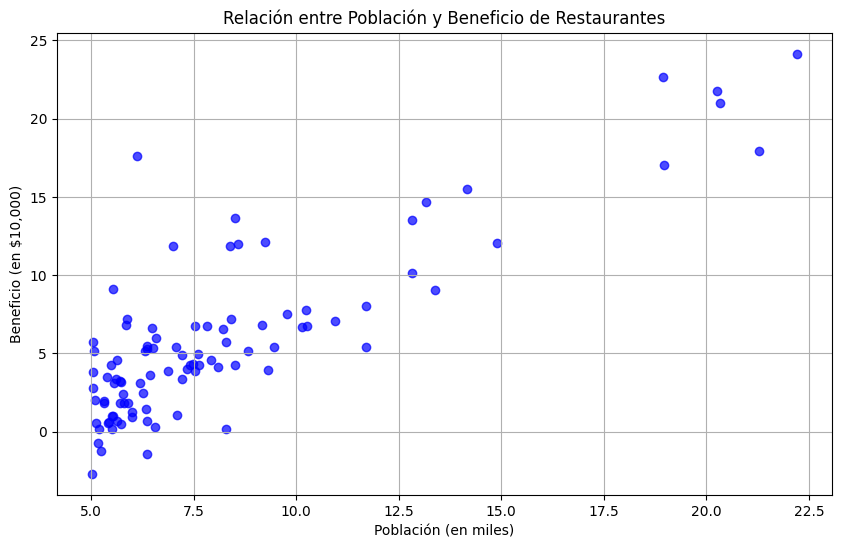

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(datos['poblation'], datos['profit'], color='blue', alpha=0.7)
plt.title('Relación entre Población y Beneficio de Restaurantes')
plt.xlabel('Población (en miles)')
plt.ylabel('Beneficio (en $10,000)')
plt.grid(True)
plt.show()

Si, la relación entre población y ganancias sí parece lineal, porque en el gráfico se ve claramente que, aunque los puntos no forman una línea perfecta, la mayoría sigue una tendencia diagonal hacia arriba, cuando la población aumenta, las ganancias también tienden a aumentar

No forma una curva, ni una onda, ni se agrupa en bloques raros.

Hay algunos puntos que se salen un poco (sobre todo en poblaciones bajas), pero la tendencia general es recta y ascendente.

Si tuviera que pasar una línea recta entre los puntos, la mayoría quedaría cerca de ella. No es perfecta, pero se ve que hay una relación directa: a más población, más ganancias.

Es lineal, porque los datos no forman patrones raros, sino que suben de manera más o menos constante.

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

In [9]:
# Calcular e imprimir la correlación
correlacion = datos['poblation'].corr(datos['profit'])
print(f"El coeficiente de correlación es: {correlacion:.3f}")

El coeficiente de correlación es: 0.838


¿Qué tan fuerte es la relación?
La correlación salió de 0.838, o sea que es mucho. Según lo que vi, mientras más cerca de 1, más fuerte es. Este casi llega a 0.9, así que sí, está muy marcada la relación

¿Es positiva o negativa?
Es positiva, cuando una sube, la otra también. En este caso, cuando aumenta la población, las ganancias del restaurante igual suben. Si fuera negativa, sería al revés

¿Es coherente con el gráfico anterior?
Sí, cuadra perfecto,  los puntos iban subiendo de izquierda a derecha y este número (0.838) básicamente le pone cifras

## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [10]:
# Construcción del modelo  y Coeficientes del modelo
from sklearn.linear_model import LinearRegression

# Preparar datos (X debe ser 2D para sklearn)
X = datos[['poblation']]  # Variable independiente (población)
y = datos['profit']       # Variable dependiente (ganancias)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener coeficientes
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]

print(f"Intercepto (a): {intercepto:.4f}")
print(f"Pendiente (b): {pendiente:.4f}")


Intercepto (a): -3.8958
Pendiente (b): 1.1930


Interpretación del Intercepto (-3.8955):

El intercepto me dice que, si hubiera un restaurante en un lugar con cero población teóricamente tendría pérdidas de aproximadamente $38,995. En la vida real, esto representa los costos fijos del restaurante (como renta, salarios o ingredientes) que se deben cubrir incluso sin clientes. Básicamente, es el punto donde la línea de regresión cruza el eje Y.



Interpretación de la Pendiente (1.1930):

Este valor es clave porque me indica que, por cada 1,000 personas adicionales en la población, las ganancias del restaurante aumentan $11,930 en promedio.

En resumen:  

Intercepto: Las pérdidas base sin población.  

Pendiente: Cuánto más ganas por cada aumento de población.

### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

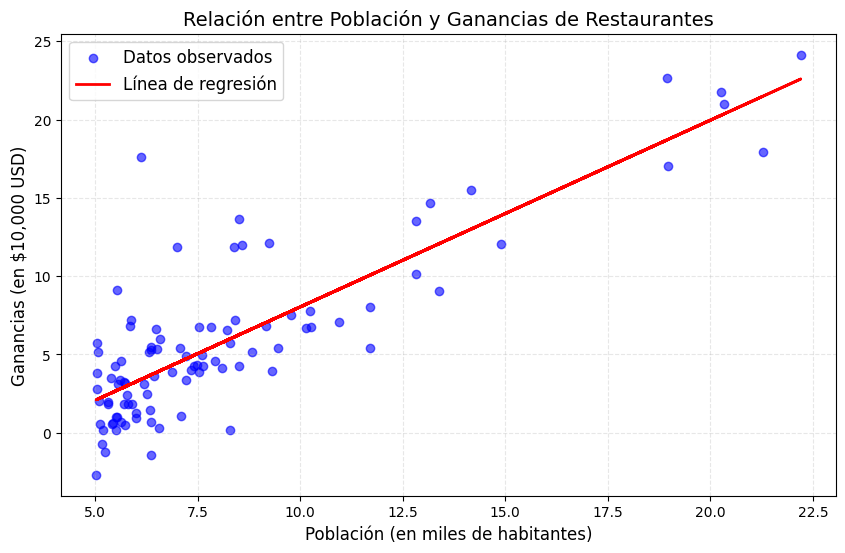

In [11]:
# Visualización del modelo ajustado
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar puntos originales
plt.scatter(datos['poblation'], datos['profit'],
            color='blue', alpha=0.6, label='Datos observados')

# Graficar línea de regresión
plt.plot(datos['poblation'], modelo.predict(datos[['poblation']]),
         color='red', linewidth=2, label='Línea de regresión')

# Personalización
plt.title('Relación entre Población y Ganancias de Restaurantes', fontsize=14)
plt.xlabel('Población (en miles de habitantes)', fontsize=12)
plt.ylabel('Ganancias (en $10,000 USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Mostrar gráfico
plt.show()


## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

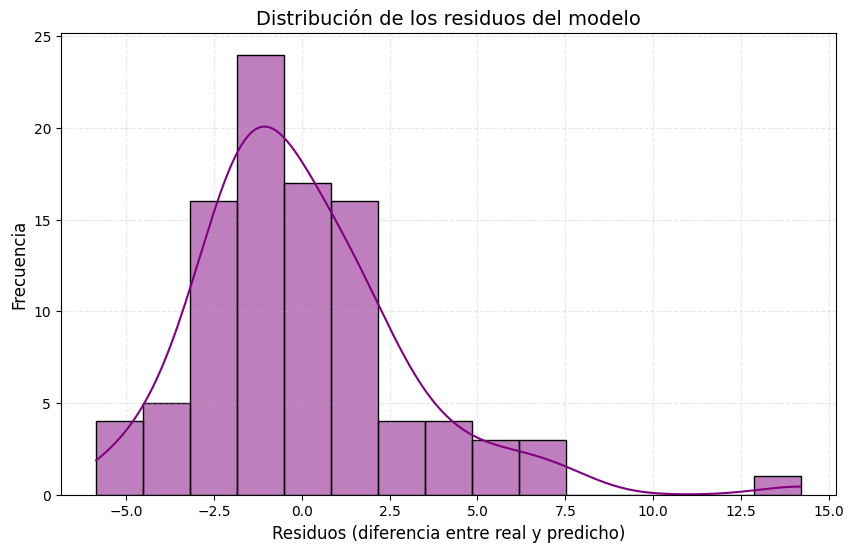


Prueba de normalidad Shapiro-Wilk: p-valor = 0.0000


In [12]:
# Normalidad de los residuos
import seaborn as sns
from scipy import stats

# Calcular residuos
predicciones = modelo.predict(datos[['poblation']])
residuos = datos['profit'] - predicciones

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple', bins=15)
plt.title('Distribución de los residuos del modelo', fontsize=14)
plt.xlabel('Residuos (diferencia entre real y predicho)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Mostrar gráfico
plt.show()

# Prueba de normalidad (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuos)
print(f"\nPrueba de normalidad Shapiro-Wilk: p-valor = {shapiro_test[1]:.4f}")


El histograma de residuos se ve normal, con una forma de campana centrada en cero. Hay asimetría hacia la derecha yvalores atípicos entre ±10 y 15, pero nada que realmente afecte la validez del modelo. Si se necesita mas precisión se podria hacer la prueba de Shapiro-Wilk para confirmar normalidad y revisar el gráfico Q-Q para checar las colaspero el modelo funciona bien.

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

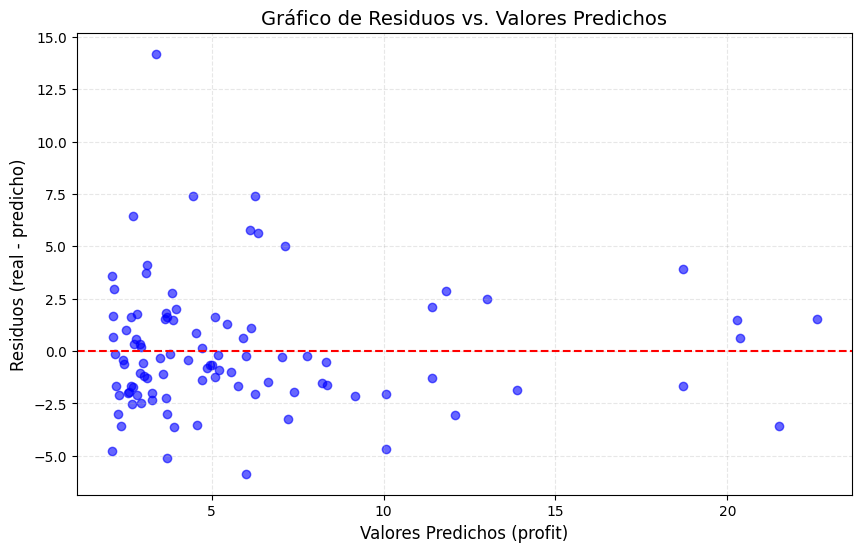

In [13]:
# Gráfico de residuos vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(predicciones, residuos, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos vs. Valores Predichos', fontsize=14)
plt.xlabel('Valores Predichos (profit)', fontsize=12)
plt.ylabel('Residuos (real - predicho)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Los residuos se distribuyen de manera aleatoria sin mostrar patrones sistemáticos, lo que indica que se cumple el supuesto de homocedasticidad

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

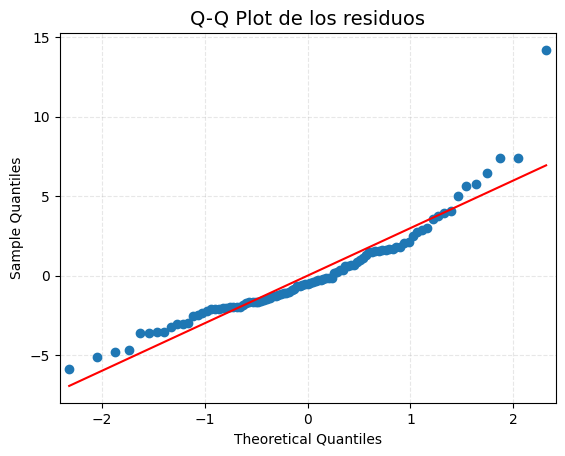

In [14]:
# Q-Q Plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuos, line='s')  # 's' = línea teórica
plt.title('Q-Q Plot de los residuos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Los puntos en el qq plot no se ven perfectos la verdad se alejan de la linea en las puntas sobre todo del lado izquierdo se van mas abajo y del derecho un poco arriba eso me dice que los residuos no son tan normales como deberian sobre todo en los extremos, las colas estan mas pesadas de lo normal y hay algo de asimetria pero en el centro si se acomodan bien a la linea entonces el modelo no esta tan mal pero tampoco es perfecto si quiero ser riguroso deberia ver eso de las colas pero para un analisis normal si sirve

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [15]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

# Calcular predicciones
y_pred = modelo.predict(X)

# Métricas
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MSE: 8.95
RMSE: 2.99
R²: 0.7020


El modelo tiene un MSE de 8.95 y RMSE de 2.99, lo que significa que en promedio se equivoca en unas 3 unidades (como $30,000). El R² de 0.70 indica que explica el 70% de la variación en las ganancias, lo cual está decente para un modelo simple.

Está bien como primera aproximación, pero hay margen de error. El 30% restante probablemente depende de otros factores que no incluye el modelo, como ubicación, competencia o tipo de restaurante. Sirve para tener una idea general, pero si necesito predicciones más exactas tendría que mejorarlo agregando más variables o revisando los casos atípicos.

## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
- ¿Qué limitaciones encuentras?
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

El modelo es útil para darme una idea general de cómo la población afecta las ganancias, pero tiene sus limitaciones. Sirve para estimaciones aproximadas, pero no es super preciso - todavía hay un margen de error considerable.

Las principales limitaciones que veo son:
1. Hay varios restaurantes donde las predicciones fallan más de lo esperado (los atípicos)
2. Solo considera la población, pero hay otros factores importantes como ubicación, competencia o tipo de comida
3. Los residuos no son perfectamente normales, especialmente en los extremos

Creo que sí valdría la pena hacer ajustes:
- Probar transformando la variable de ganancias (como usar logaritmo) para mejorar la normalidad
- Considerar agregar más variables predictoras
- Revisar bien esos casos atípicos a ver si hay algún patrón

No es un mal modelo para empezar, pero si quiero algo más preciso y confiable, definitivamente necesita ajustes. Para un análisis rápido está bien, pero para decisiones importantes habría que mejorarlo.